# Simple Model of Cyclotron Radiation

In this notebook we will put together a very simple analyitical model of the cyclotron radiation. This features lots of equations scrounged from the web as I desperately try and remember anything about electromagnetism. The hope is that the simple model may be useful for determining a reasonable free space detection antenna setup.

The starting point is the observation from "Applications of Electrodynamics in Theoretical Physics and Astrophysics", by V. L. Ginzburg that cylotron radiation from a charge moving circularly with non-relativistic velocity is equivalent to a constant electric dipole of moment $r_g q$ rotating with frequency $\omega$. Further the radiation emitted by such a rotating dipole is the same as the radiation emitted by two crossed oscillating dipoles which are $\frac{\pi}{2}$ out of phase.

## Non-Relativistic Cyclotron
This is slightly oxymoronic as cyclotron radiaiton is non-relativisitc.

Let's start with some definitions. The Lorentz force on a particle of charge $q$ moving with velocity $\vec{v}$ in a uniform magnetic field $\vec{B}$ is
$$\vec{F}=q\left( \vec{v} \times \vec{B} \right)$$
given the cross-product the acceleration must be perpendicular to both $\vec{B}$ and $\vec{v}$, hence the particle will move in a circle. By equating the centripetal force to the Lorentz force we get (magnitudes only)
$$\frac{m v_\perp^2}{r_g} = |q| v_\perp B$$
so $r_g$ the radius of gyration is
$$r_g = \frac{m v_\perp}{|q| B}$$

The period, $T_g$, and frequency, $f_g$ of gyration are trivially
$$ T_g = \frac{2 \pi r_g}{v_\perp}$$
and
$$ f_g = \frac{v_\perp}{2 \pi r_g} = \frac{|q| B}{2 \pi m}$$
and the angular frequency $w_g$ is
$$ w_g =  \frac{|q| B}{m}$$


The emitted radiation is going to have the same angular frequcny, so 
$$w_g = 2 \pi f = \frac{2 \pi c}{\lambda}$$
we can now compare the wavelength $\lambda$ to the radius of gyration using
$$ r_g =\frac{v_\perp}{w_g} = \frac{v_\perp}{c} \frac{\lambda}{2 \pi} $$

Telling us that if $\frac{v_\perp}{c} \ll 1$ then $ \frac{ 2 \pi r_g}{\lambda} \ll 1$ so we can treat the cylotron emission as a point source in the non relativistic limit. 

## Crossed dipole approximation
Now in order to actually calculate electric field we first need the electric field of an oscillating elctric dipole (a harmonic oscillator). For an oscillating dipole of the form 
$$\vec{p} = q d \cos \left(\omega t\right) \hat{z}$$
the far field ($d \ll \lambda \ll r$) electric field is
$$ \vec{E}(\vec{r},t) \approx - \frac{\mu_0 p \omega^2}{4 \pi} \left( \frac{\sin \theta}{r} \right) \cos \left[ w \left(t - \frac{r}{c} \right) \right] \hat{\theta} $$
where $p=qd$ is the electric dipole moment. Taken from Lecture 13 of http://web.hep.uiuc.edu/home/serrede/P436/P436_Lectures.html

Instead of having an oscillating dipole in the $\hat{z}$ direction we want to find the field for two oscillating dipoles in $\hat{x}$ and $\hat{y}$ directions. So let's first write the above equation in terms of $\hat{r}$ and $\hat{z}$ using $\sin \theta \hat{\theta} = \cos \theta \hat{r} - \hat{z}$ and $\cos \theta = \frac{z}{r}$ 
$$ \vec{E_{p_z}}(\vec{r},t) \approx - \frac{\mu_0 p \omega^2}{4 \pi r} \left( \frac{z}{r} \hat{r} - \hat{z} \right) \cos \left[ w \left(t - \frac{r}{c} \right) \right]  $$
Then assuming $\vec{p_x}=p \cos (\omega t_r) \hat{x} $ and $\vec{p_y} =p \sin (\omega t_r) \hat{y}$ we can write

$$ \vec{E_{p_x}}(\vec{r},t) \approx - \frac{\mu_0 p \omega^2}{4 \pi r} \left( \frac{x}{r} \hat{r} - \hat{x} \right) \cos \left[ w \left(t - \frac{r}{c} \right) \right]  $$
$$ \vec{E_{p_y}}(\vec{r},t) \approx - \frac{\mu_0 p \omega^2}{4 \pi r} \left( \frac{y}{r} \hat{r} - \hat{y} \right) \sin \left[ w \left(t - \frac{r}{c} \right) \right]  $$

Now we can simply add these together
$$ \vec{E_{tot}}(\vec{r},t) \approx - \frac{\mu_0 p \omega^2}{4 \pi r} \left( \left( \frac{x}{r} \hat{r} - \hat{x} \right) \cos \left[ w \left(t - \frac{r}{c} \right) \right] + \left( \frac{y}{r} \hat{r} - \hat{y} \right) \sin \left[ w \left(t - \frac{r}{c} \right) \right] \right)  $$
from here we can calculate the retarded Poynting vector
$$ \vec{S}(\vec{r},t)=\frac{1}{\mu_0} \left(\vec{E}(\vec{r},t) \times \vec{B}(\vec{r},t)\right)$$
$$ \vec{S}(\vec{r},t)= \frac{1}{\mu_0 c} \left(\frac{\mu_0 p \omega^2}{4 \pi r}\right)^2 \left\{1 -\frac{1}{2} \sin^2 \theta \cos^2\left[\omega \left(t - \frac{r}{c}\right) - \phi \right] \right\} \hat{r} $$


## Enough equations can we plot something already?

In [1]:
# Import some standard python analysis and plotting packages
import numpy as np
import math as m
import scipy.constants
import matplotlib.pyplot as plt
import matplotlib
import math
matplotlib.rcParams['figure.dpi']=300 # highres display

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Avenir']})

In [2]:
def getTInJ(TineV):
    return TineV*scipy.constants.e
# Define the kinetic energy at the tritium end point
T_end_ev=18.574*1000
T_end=getTInJ(T_end_ev)  #18.574keV in J
B=1 # 1 T

def getCyclotronOmega(B,T):
    """Function to return the cyclotron frequency emitted by an electron with kinetic energy T 
    in a magentic field B

    Args:
        B: The magentic field in Tesla
        T: The kinetic energy in Joules
        
    Returns:
        The cylotron angular frequency, w_c, in rad./s

    """
    return ((scipy.constants.e*B)/(scipy.constants.m_e + T/(scipy.constants.c**2)))

def getCyclotronFreq(B,T):
    """Function to return the cyclotron frequency emitted by an electron with kinetic energy T 
    in a magentic field B

    Args:
        B: The magentic field in Tesla
        T: The kinetic energy in Joules
        
    Returns:
        The cylotron frequency, f_c, in Hz.

    """
    return getCyclotronOmega(B,T)/(2*np.pi)




## Spherical Polar Coordinates 
### Why do I always mess things up in circles?
The conversion matrices between cartesian and spherical polar unit vectors are.
$$ \begin{bmatrix}
\hat{x}\\
\hat{y}\\
\hat{z}
\end{bmatrix}  = 
\begin{bmatrix}
\sin\theta \cos\phi & \cos\theta \cos\phi & -\sin \phi \\
\sin\theta \sin\phi & \cos\theta \sin\phi & \cos\phi \\
\cos\theta & -\sin\theta & 0 
\end{bmatrix}
\begin{bmatrix}
\hat{r}\\
\hat{\theta}\\
\hat{\phi}
\end{bmatrix}
$$

The inverse matrix is the transpose
$$ 
\begin{bmatrix}
\hat{r}\\
\hat{\theta}\\
\hat{\phi}
\end{bmatrix}= 
\begin{bmatrix}
\sin\theta \sin\phi & \sin\theta \sin\phi & \cos \theta \\
\cos\theta \cos\phi & \cos\theta \sin\phi & -\sin\theta \\
-\sin\phi & \cos\phi & 0 
\end{bmatrix}
\begin{bmatrix}
\hat{x}\\
\hat{y}\\
\hat{z}
\end{bmatrix}  
$$

So the unit vector in the $\hat{\theta}$ direction is in cartesian coordinates
$$\begin{bmatrix}
\cos\theta \cos\phi \hat{x}\\
\cos\theta \sin\phi \hat{y}\\
-\sin\theta \hat{z}
\end{bmatrix}$$
and the unit vector in the $\hat{r}$ direction is 
$$\begin{bmatrix}
\sin\theta \cos\phi \hat{x}\\
\sin\theta \sin\phi \hat{y}\\
\cos\theta \hat{z}
\end{bmatrix}$$


In [3]:
def electricFieldOscillatingDipoleZ(T,B,inX,inY,inZ,t,offset=[0,0,0]):  
    tempX=inX-offset[0]
    tempY=inY-offset[1]
    tempZ=inZ-offset[2]
    tempTheta=np.arctan2(np.sqrt(tempX**2 + tempY**2),tempZ)
    tempR=np.sqrt(tempX**2 + tempY**2 +tempZ**2) 
    tempPhi=np.arctan2(tempY,tempX)
    me=scipy.constants.electron_mass
    v=np.sqrt(2*T/me)
    #w=scipy.constants.e*B/me
    w=getCyclotronOmega(B,T)
    d=v/w
    sintheta=np.sin(tempTheta)
    costheta=np.cos(tempTheta)
    sinphi=np.sin(tempPhi)
    cosphi=np.cos(tempPhi)
    A=-(scipy.constants.mu_0*scipy.constants.e*d*w**2*sintheta)/(4*math.pi*tempR) 
    B=np.cos(w*(t-tempR/scipy.constants.c))
    Ex=A*B*(costheta*cosphi)
    Ey=A*B*costheta*sinphi
    Ez=A*B*(-sintheta)
    return np.array([Ex,Ey,Ez])

def electricFieldOscillatingDipoleZ2(T,B,inX,inY,inZ,t,offset=[0,0,0]):  
    tempX=inX-offset[0]
    tempY=inY-offset[1]
    tempZ=inZ-offset[2]
    tempTheta=np.arctan2(np.sqrt(tempX**2 + tempY**2),tempZ)
    tempR=np.sqrt(tempX**2 + tempY**2 +tempZ**2) 
    tempPhi=np.arctan2(tempY,tempX)
    
    me=scipy.constants.electron_mass
    v=np.sqrt(2*T/me)
    #w=scipy.constants.e*B/me
    w=getCyclotronOmega(B,T)
    d=v/w
    sintheta=np.sin(tempTheta)
    costheta=np.cos(tempTheta)
    sinphi=np.sin(tempPhi)
    cosphi=np.cos(tempPhi)
    A=-(scipy.constants.mu_0*scipy.constants.e*d*w**2)*np.cos(w*(t-tempR/scipy.constants.c))/(4*math.pi*tempR)
    B=(tempZ/tempR)
    Bx=A*B*(sintheta*cosphi )
    By=A*B*sintheta*sinphi
    Bz=A*(B*costheta-1)
    return np.array([Bx,By,Bz])


def electricFieldRotatingDipoleCartesian(T,B,inX,inY,inZ,t,offset=[0,0,0]): 
    tempX=inX-offset[0]
    tempY=inY-offset[1]
    tempZ=inZ-offset[2] 
    tempTheta=np.arctan2(np.sqrt(tempX**2 + tempY**2),tempZ)
    tempR=np.sqrt(tempX**2 + tempY**2 +tempZ**2) 
    tempPhi=np.arctan2(tempY,tempX)
    print(tempTheta/math.pi,"pi",tempR,tempPhi/math.pi,"pi")
    
    
    me=scipy.constants.electron_mass
    v=np.sqrt(2*T/me)
    #w=scipy.constants.e*B/me
    w=getCyclotronOmega(B,T)
    d=v/w
    sintheta=np.sin(tempTheta)
    costheta=np.cos(tempTheta)
    sinphi=np.sin(tempPhi)
    cosphi=np.cos(tempPhi)
    A=-(scipy.constants.mu_0*scipy.constants.e*d*w**2)/(4*math.pi*tempR)
    coswt=np.cos(w*(t-tempR/scipy.constants.c))
    B=(tempX/tempR)
    Bx=B*sintheta*cosphi -1
    By=B*sintheta*sinphi
    Bz=B*costheta
    sinwt=np.sin(w*(t-tempR/scipy.constants.c))
    C=(tempY/tempR)
    Cx=C*sintheta*cosphi
    Cy=C*sintheta*sinphi-1
    Cz=C*costheta
    #print(np.shape(A),np.shape(Bx),np.shape(Cx))
    return np.array([A*(Bx*coswt+Cx*sinwt),A*(By*coswt+Cy*sinwt),A*(Bz*coswt+Cz*sinwt)])


def electricFieldRotatingDipole(T,B,inZ,phi,rcyl,t,coord='cartesian',offset=[0,0,0]):   
    inX=rcyl*np.cos(phi)
    inY=rcyl*np.sin(phi)
    tempX=inX-offset[0]  #Note offset is in cartesian coordinates
    tempY=inY-offset[1]
    tempZ=inZ-offset[2] 
    tempTheta=np.arctan2(np.sqrt(tempX**2 + tempY**2),tempZ)
    tempR=np.sqrt(tempX**2 + tempY**2 +tempZ**2) 
    tempPhi=np.arctan2(tempY,tempX)
    
    me=scipy.constants.electron_mass
    v=np.sqrt(2*T/me)
    #w=scipy.constants.e*B/me
    w=getCyclotronOmega(B,T)
    d=v/w
    sintheta=np.sin(tempTheta)
    costheta=np.cos(tempTheta)
    sinphi=np.sin(tempPhi)
    cosphi=np.cos(tempPhi)
    A=-(scipy.constants.mu_0*scipy.constants.e*d*w**2)/(4*math.pi*tempR)
    coswt=np.cos(w*(t-tempR/scipy.constants.c))
    B=(tempX/tempR)
    Bx=B*sintheta*cosphi -1
    By=B*sintheta*sinphi
    Bz=B*costheta
    sinwt=np.sin(w*(t-tempR/scipy.constants.c))
    C=(tempY/tempR)
    Cx=C*sintheta*cosphi
    Cy=C*sintheta*sinphi-1
    Cz=C*costheta
    #print(np.shape(A),np.shape(Bx),np.shape(Cx))
    Ex=A*(Bx*coswt+Cx*sinwt)
    Ey=A*(By*coswt+Cy*sinwt)
    Ez=A*(Bz*coswt+Cz*sinwt)
    
    if coord == 'cartesian':
        return np.array([Ex,Ey,Ez])
    elif coord == 'spherical':
        Er=sintheta*cosphi*Ex + sintheta*sinphi*Ey+costheta*Ez
        Etheta=costheta*cosphi*Ex + costheta*cosphi*Ey-sinthetaEz
        Ephi=-sinphi*Ex+cosphi*Ey
        return np.array([Er,Etheta,Ephi])
    elif coord=='cylindrical':
        Erho=cosphi*Ex+sinphi*Ey   #Remember phi in spherical maps to the angle in cylindrical
        Eangle=-sinphi*Ex + cosphi*Ey
        return np.array([Erho,Eangle,Ez])
    else:
        print("What is coord:",coord)
        

In [4]:
tIn=np.linspace(0,1e-9,1000)
rcyl=0.05  #Radius of a cylinder (might be in metres but need to go back and check some of the units)
zMax=0.1
z = np.linspace(-zMax, zMax, 101)  # Cylinder runs from -1 to 1
theta = np.linspace(0, 2*math.pi, 101) # Angle round the cylinder
Z,Theta = np.meshgrid(z,theta)   #Create a 2D grid of Z vs theta for making colour plots

newZ=np.repeat(Z[:, :, np.newaxis], len(tIn), axis=2)
newTheta=np.repeat(Theta[:, :, np.newaxis], len(tIn), axis=2)

#print(newZ)
eField=electricFieldRotatingDipole(T_end,1,newZ,newTheta,rcyl,tIn,coord='cylindrical')


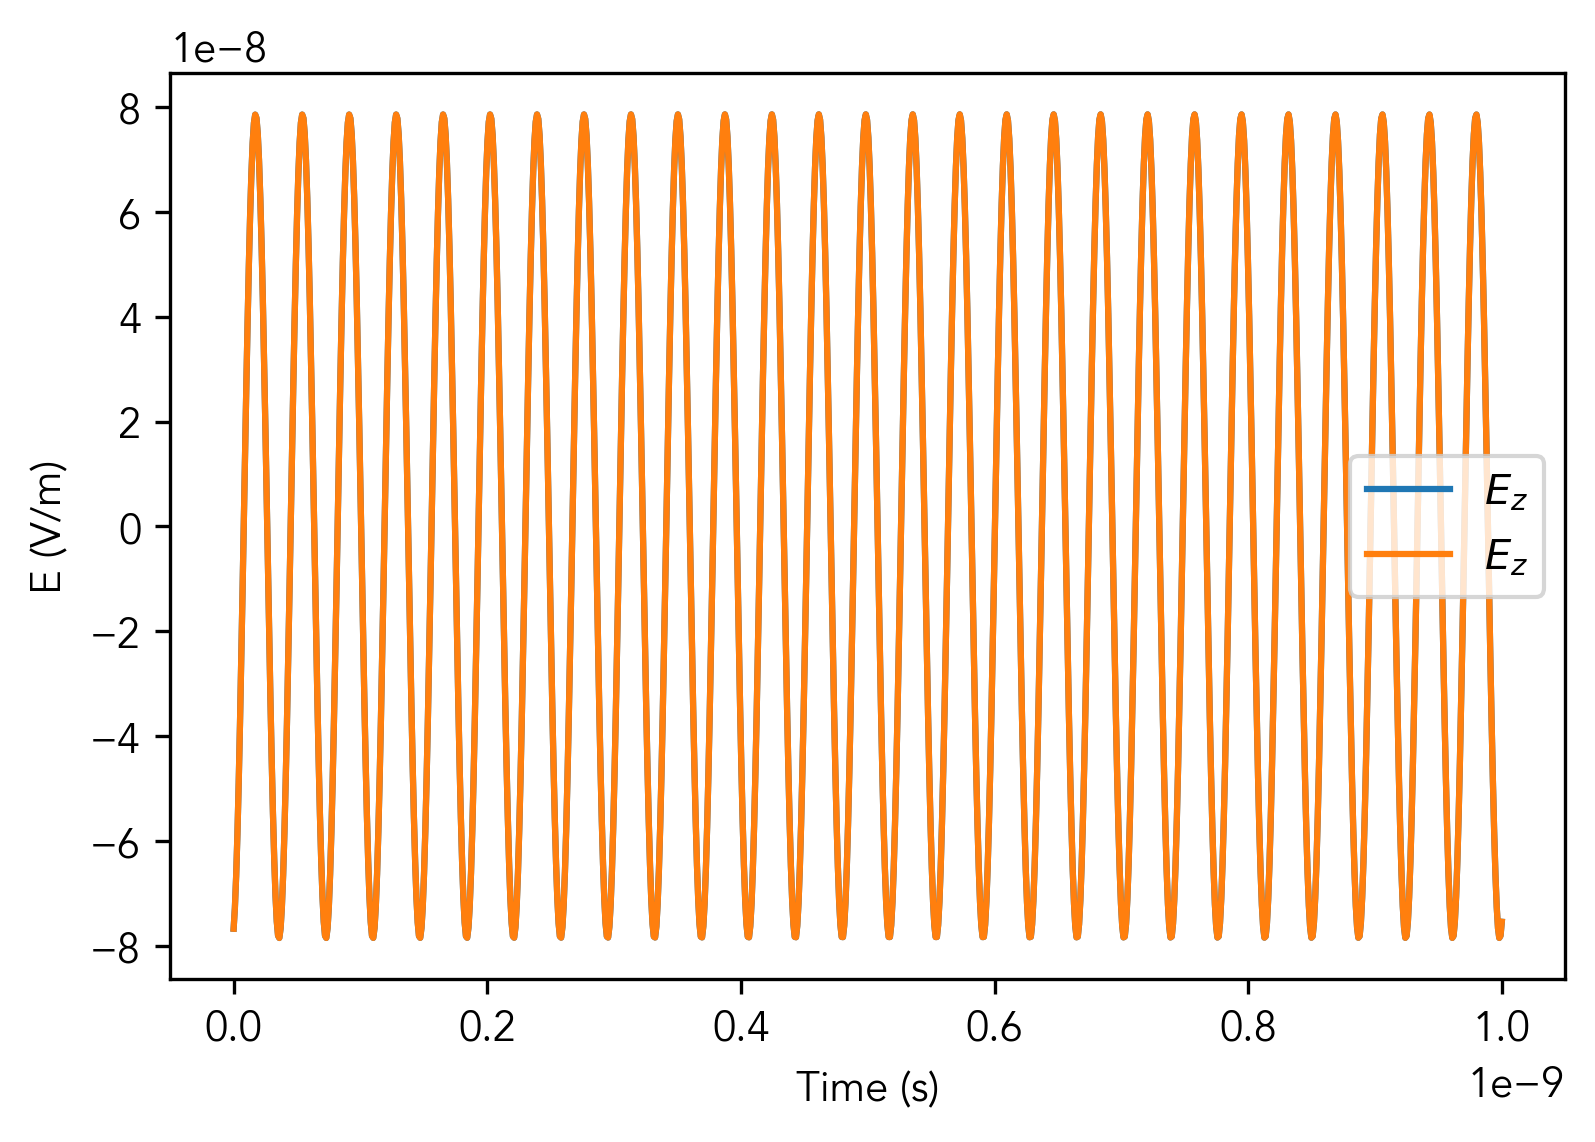

In [5]:
xVal=-2
yVal=0
zVal=1
fig, ax = plt.subplots()
eField1d=electricFieldOscillatingDipoleZ(T_end,1,xVal,yVal,zVal,tIn)
eField1d2=electricFieldOscillatingDipoleZ2(T_end,1,xVal,yVal,zVal,tIn)
#ax.plot(tIn,eField1d[0],label="$E_x$")
#ax.plot(tIn,eField1d[1],label="$E_y$")
ax.plot(tIn,eField1d[2],label="$E_z$")
#ax.plot(tIn,eField1d2[0],label="$E_x$")
#ax.plot(tIn,eField1d2[1],label="$E_y$")
ax.plot(tIn,eField1d2[2],label="$E_z$")
ax.set_xlabel("Time (s)")
ax.set_ylabel("E (V/m)")
#ax.set_title("Electric Field @ $z=$"+str(zPos)+r", $\theta=$"+str(thetaPos)+", $r=$"+str(rCylinder))
ax.legend()

In [6]:
print(np.shape(eField[0]))
eFieldMag=np.sqrt(eField[0]**2 + eField[1]**2 +eField[2]**2)

#Assuming we used the coord='cylindircal' option from earlier
eFieldRho=eField[0]
eFieldAngle=eField[1]
eFieldZ=eField[2]
#print(eFieldMag[:,:,0])

(101, 101, 1000)


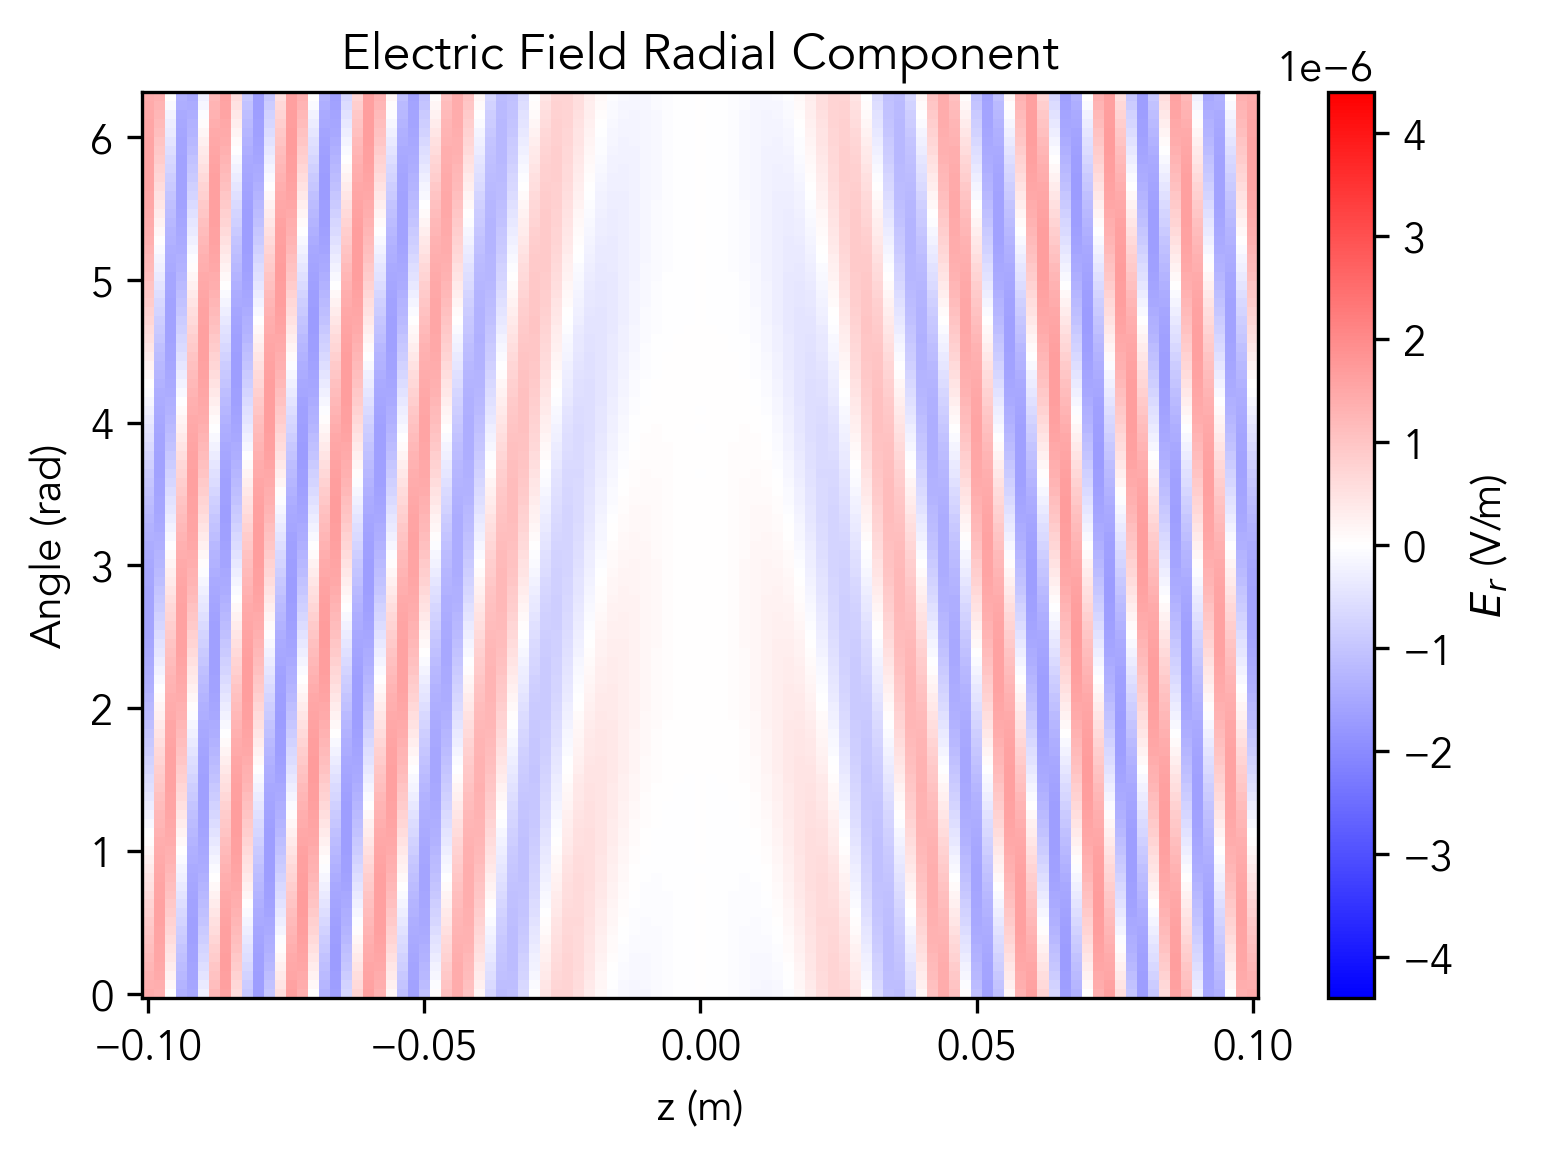

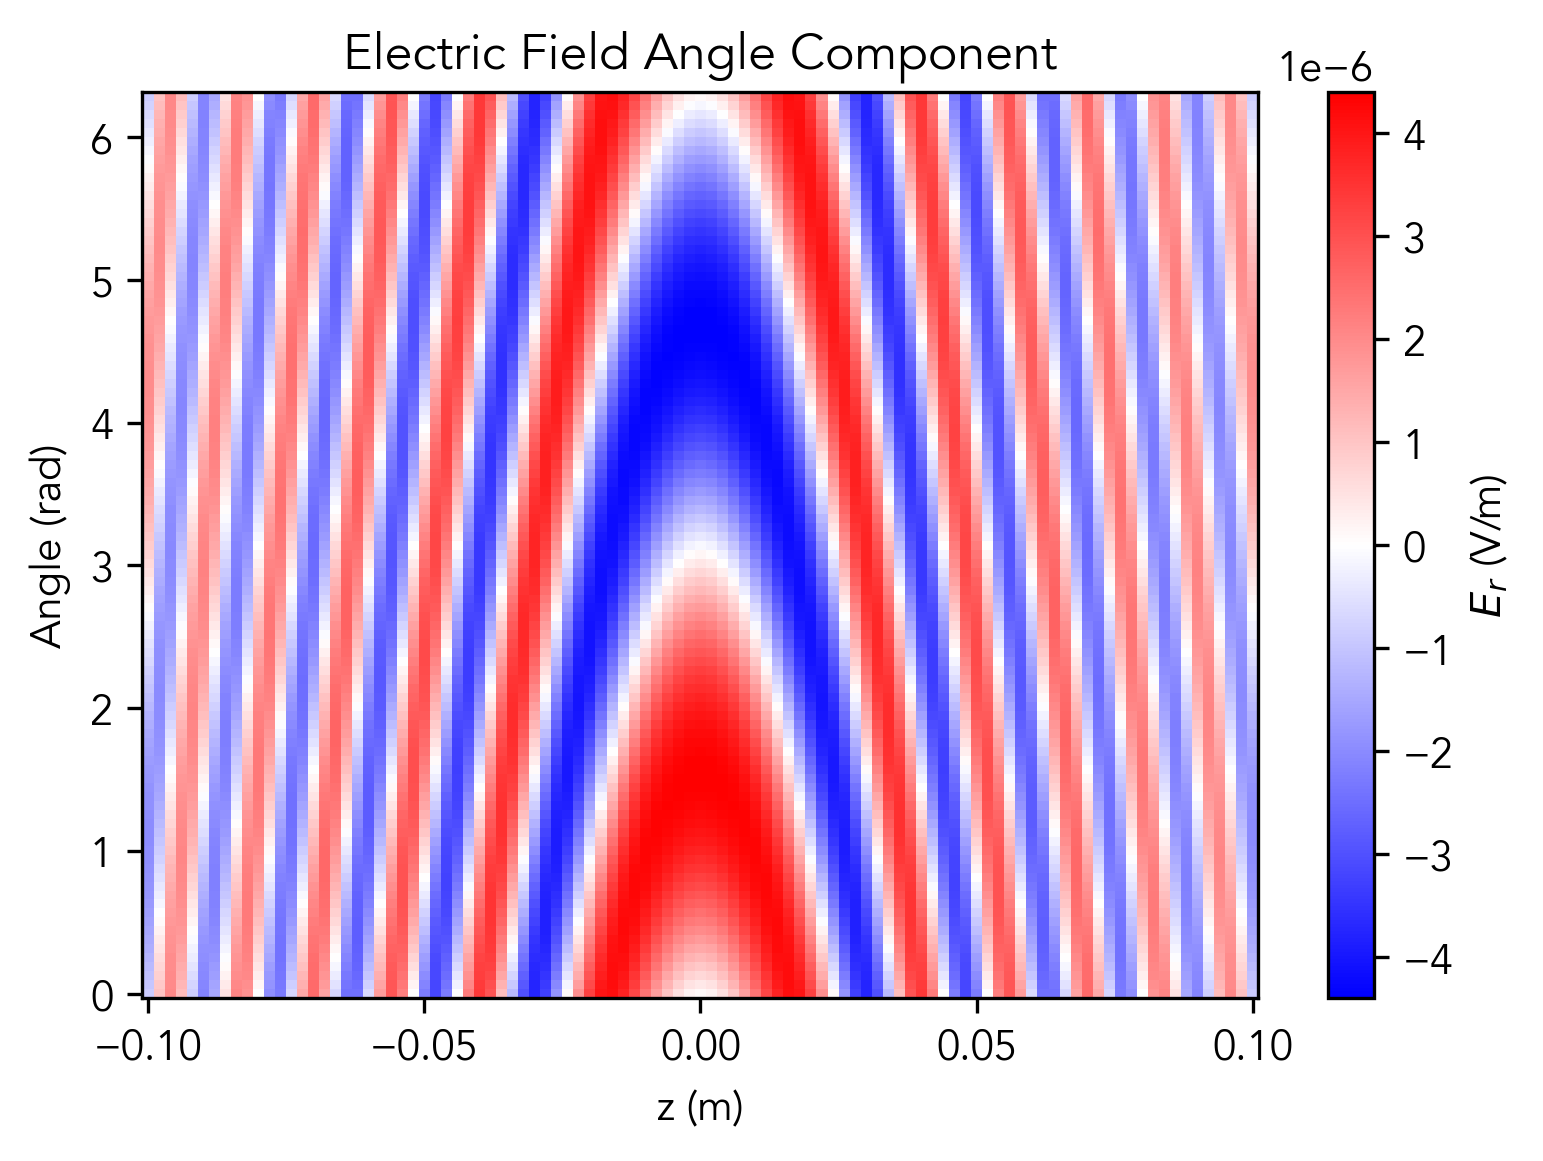

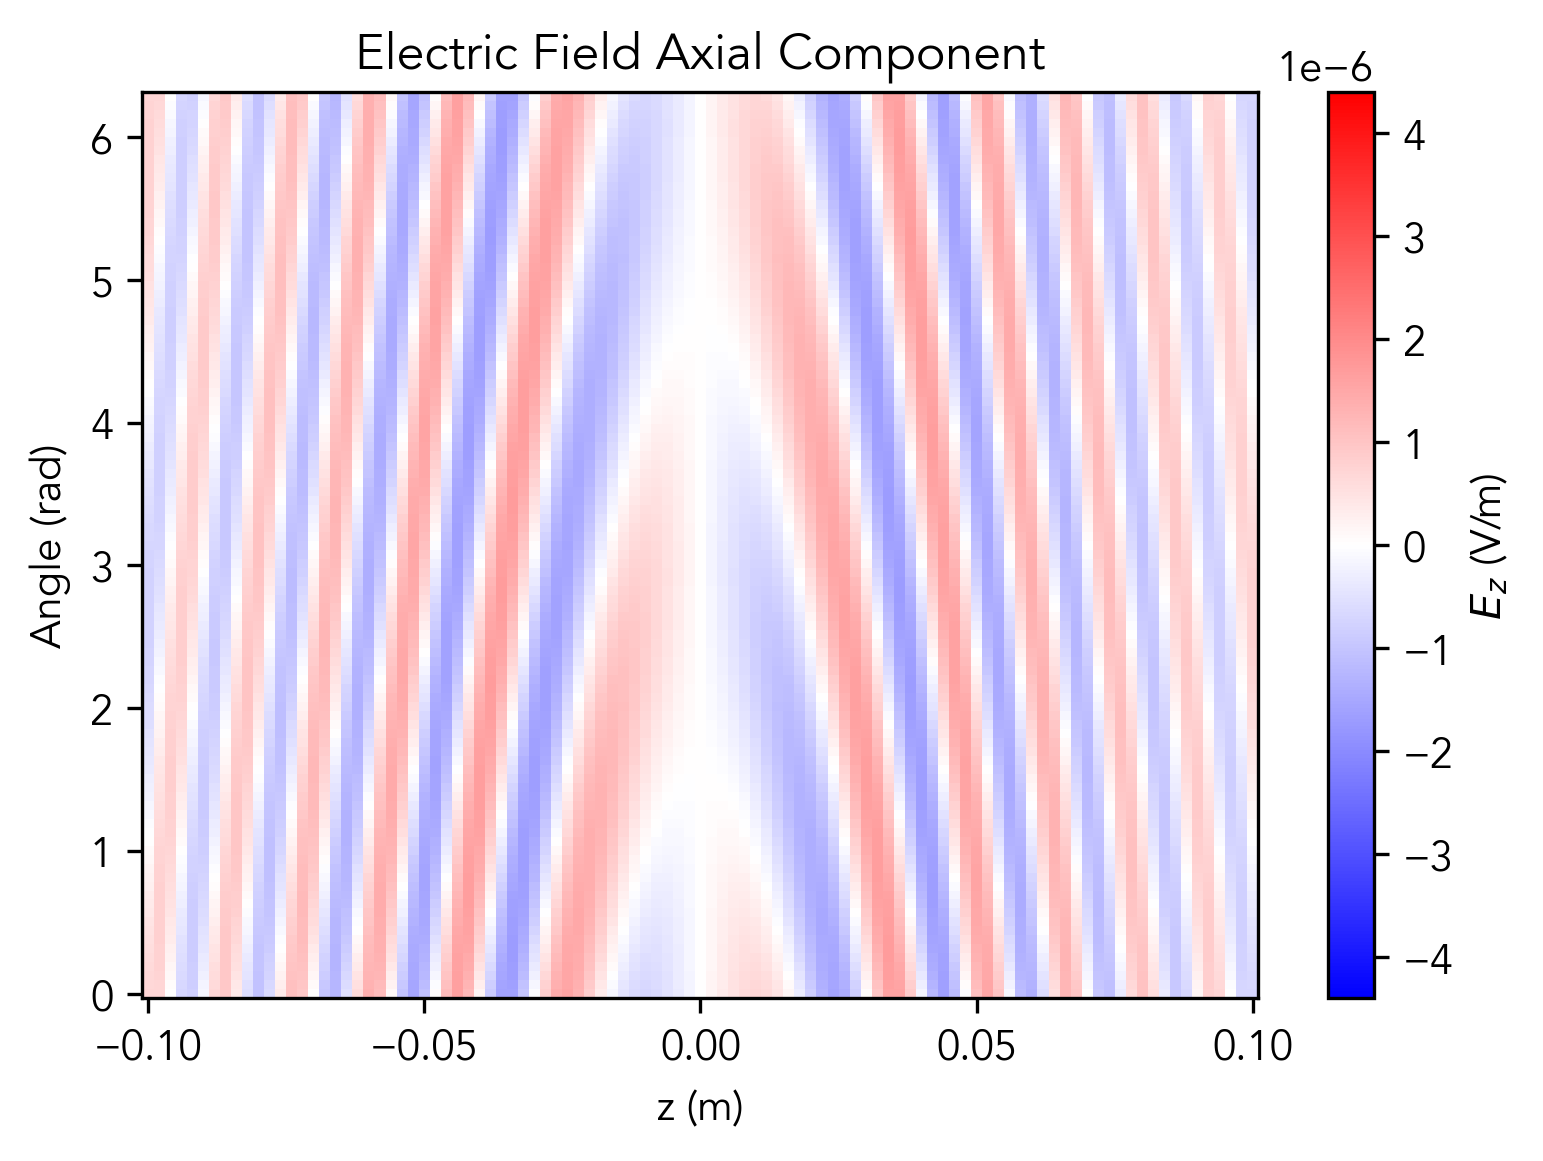

In [7]:
eMax=np.max(eFieldMag)

diverging=['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
                      'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

fig, ax = plt.subplots()
cmap=ax.pcolormesh(Z, Theta,eFieldRho[:,:,0],vmax=eMax,vmin=-eMax,cmap='bwr')
cbar=fig.colorbar(cmap)
ax.set_title("Electric Field Radial Component")
ax.set_xlabel("z (m)")
ax.set_ylabel("Angle (rad)")
cbar.set_label("$E_r$ (V/m)")


fig, ax = plt.subplots()
cmap=ax.pcolormesh(Z, Theta,eFieldAngle[:,:,0],vmax=eMax,vmin=-eMax,cmap='bwr')
cbar=fig.colorbar(cmap)
ax.set_title("Electric Field Angle Component")
ax.set_xlabel("z (m)")
ax.set_ylabel("Angle (rad)")
cbar.set_label("$E_r$ (V/m)")


fig, ax = plt.subplots()
cmap=ax.pcolormesh(Z, Theta,eFieldZ[:,:,0],vmax=eMax,vmin=-eMax,cmap='bwr')
cbar=fig.colorbar(cmap)
ax.set_title("Electric Field Axial Component")
ax.set_xlabel("z (m)")
ax.set_ylabel("Angle (rad)")
cbar.set_label("$E_z$ (V/m)")

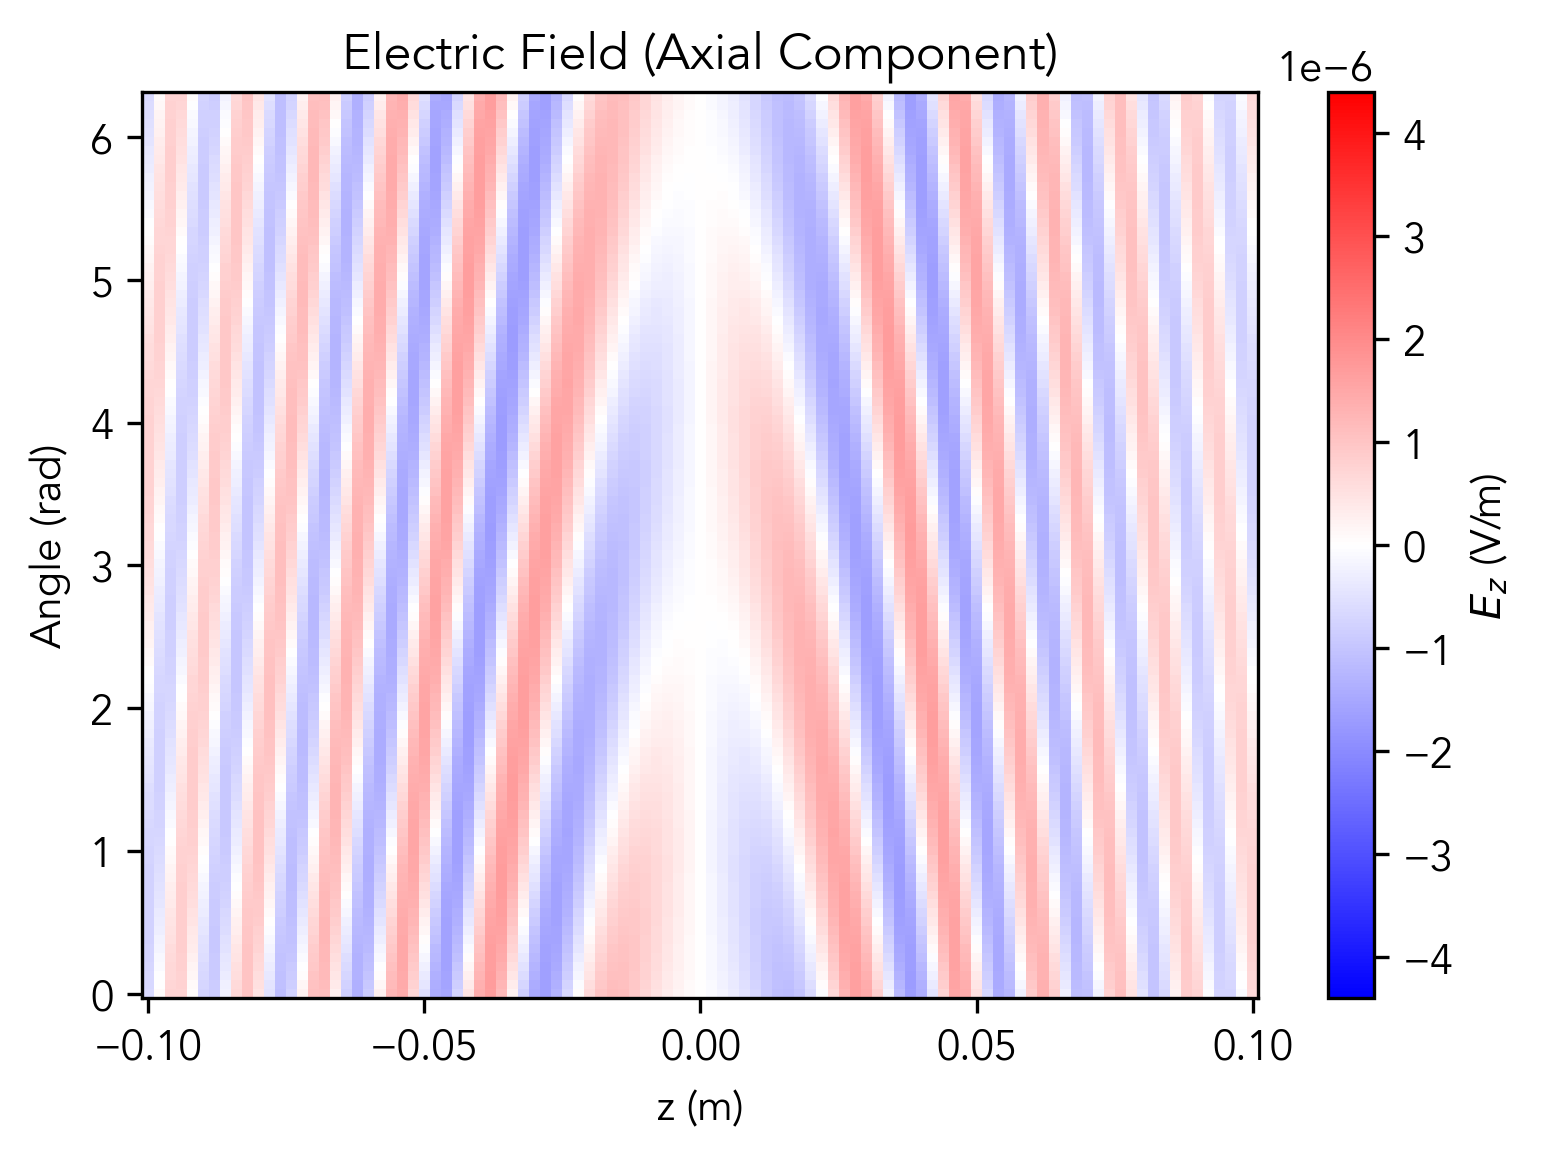

In [8]:
#eMax=1.5e-6

from matplotlib import pyplot as plt, animation
fig, ax = plt.subplots()
cmap=ax.pcolormesh(z, theta,eFieldZ[:,:,0],vmax=eMax,vmin=-eMax,cmap='bwr')
ax.set_title("Electric Field (Axial Component)")
ax.set_xlabel("z (m)")
ax.set_ylabel("Angle (rad)")
#ax.set_zlabel("|E| (V/m)")
cbar=fig.colorbar(cmap)
cbar.set_label("$E_z$ (V/m)")

def animate(i):
    cmap.set_array(eFieldZ[:, :, i])

anim = animation.FuncAnimation(fig, animate, interval=100, frames=100)
anim.save('cylotronFieldAxial.gif')
plt.show()



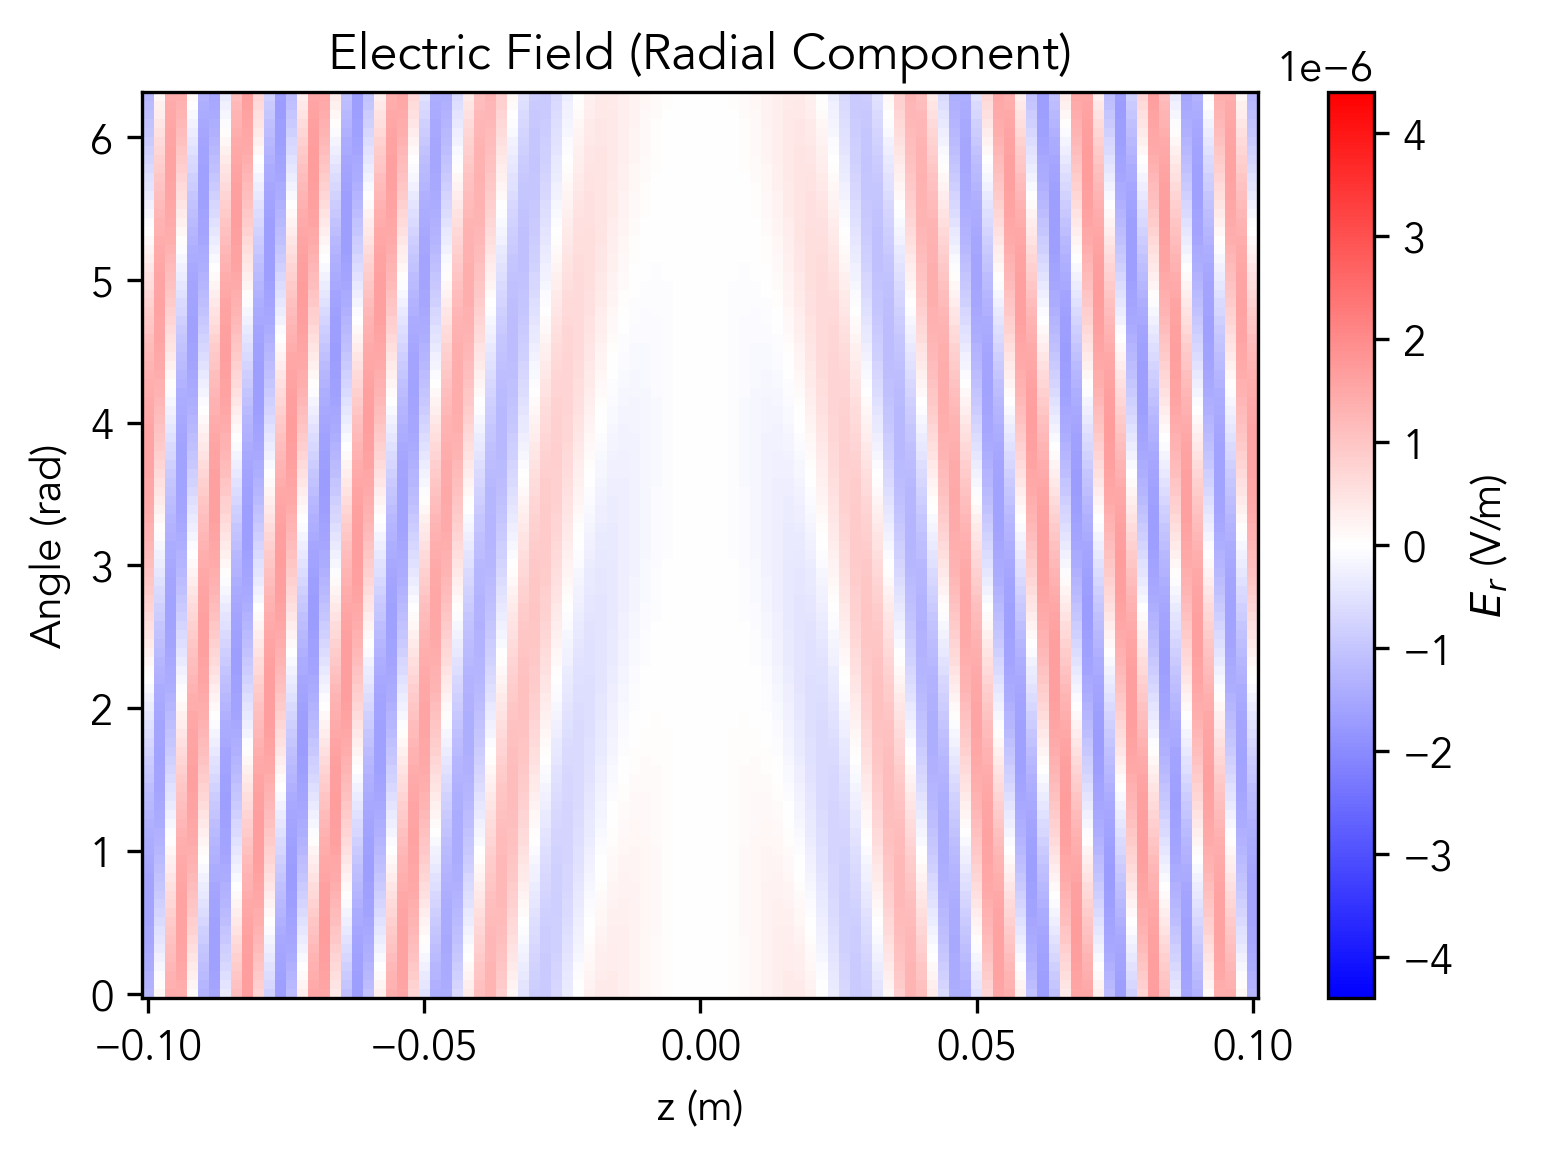

In [9]:

fig, ax = plt.subplots()
cmap=ax.pcolormesh(z, theta,eFieldRho[:,:,0],vmax=eMax,vmin=-eMax,cmap='bwr')
ax.set_title("Electric Field (Radial Component)")
ax.set_xlabel("z (m)")
ax.set_ylabel("Angle (rad)")
#ax.set_zlabel("|E| (V/m)")
cbar=fig.colorbar(cmap)
cbar.set_label("$E_r$ (V/m)")

def animate(i):
    cmap.set_array(eFieldRho[:, :, i])

anim = animation.FuncAnimation(fig, animate, interval=100, frames=100)
anim.save('cylotronFieldRadial.gif')
plt.show()

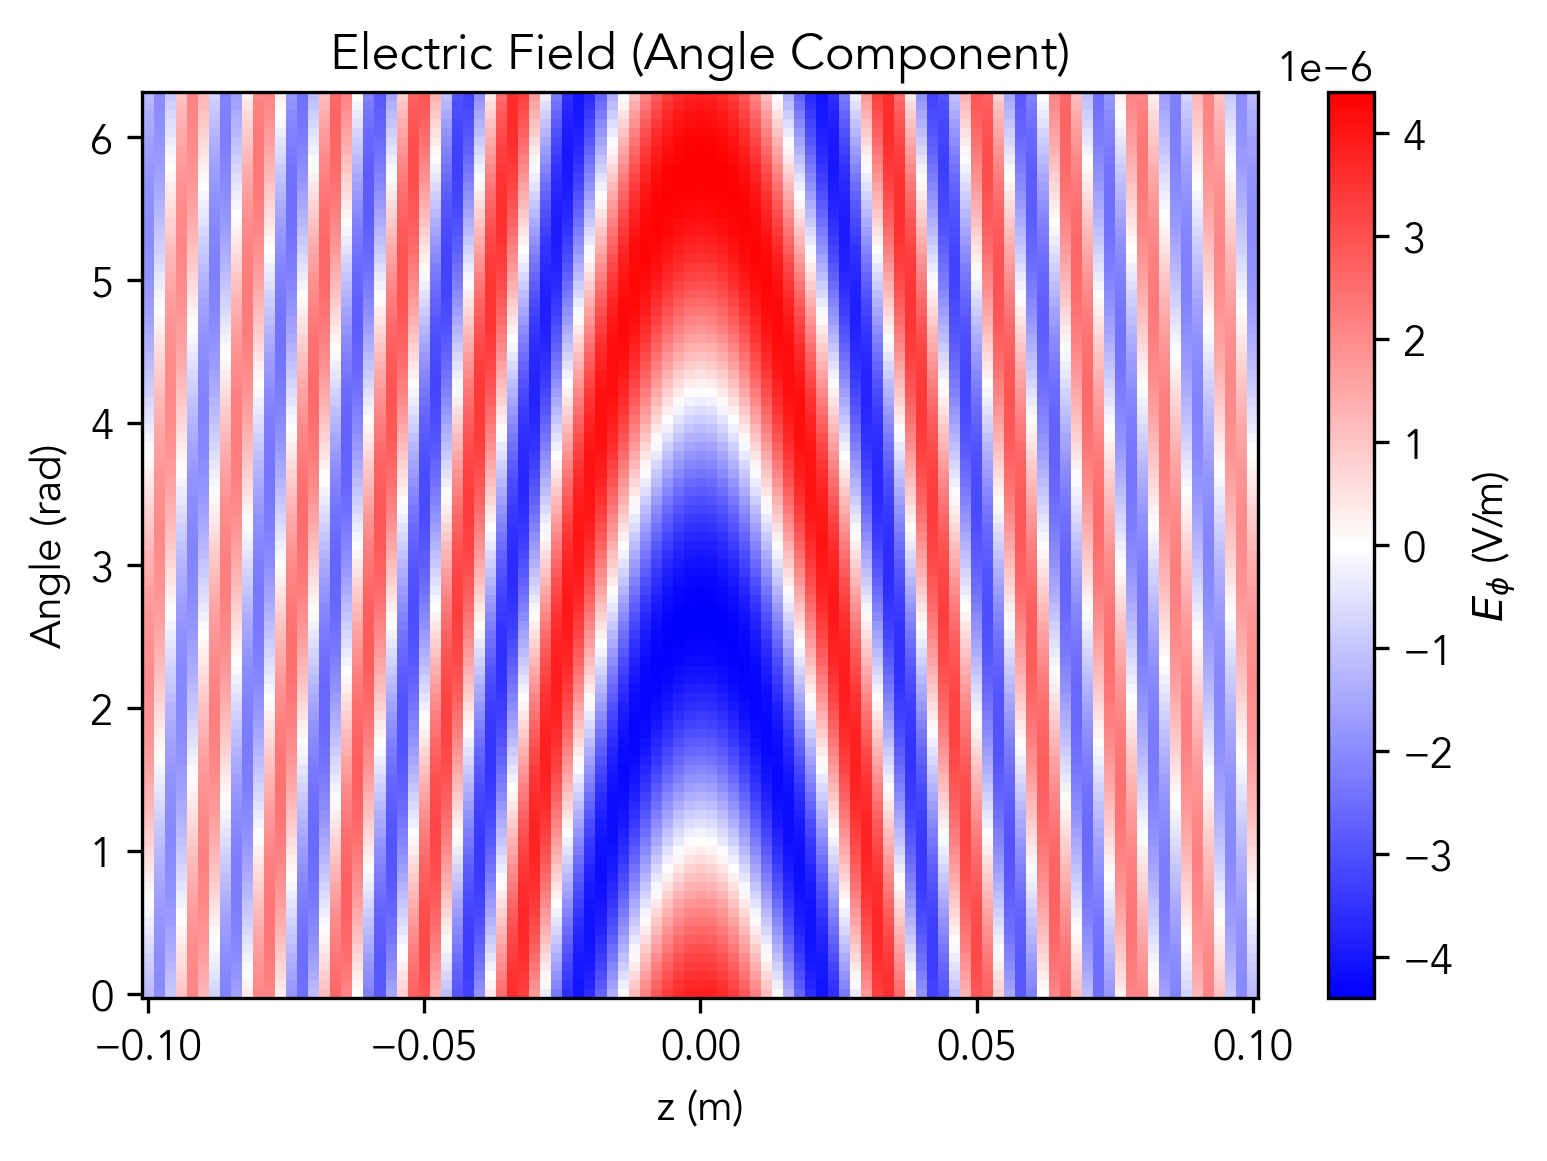

In [10]:
fig, ax = plt.subplots()
cmap=ax.pcolormesh(z, theta,eFieldAngle[:,:,0],vmax=eMax,vmin=-eMax,cmap='bwr')
ax.set_title("Electric Field (Angle Component)")
ax.set_xlabel("z (m)")
ax.set_ylabel("Angle (rad)")
#ax.set_zlabel("|E| (V/m)")
cbar=fig.colorbar(cmap)
cbar.set_label("$E_\phi$ (V/m)")

def animate(i):
    cmap.set_array(eFieldAngle[:, :, i])

anim = animation.FuncAnimation(fig, animate, interval=100, frames=100)
anim.save('cylotronFieldAngle.gif')
plt.show()

In [11]:
def getNonRelOmegaFromT(T):
    me=scipy.constants.electron_mass
    v=np.sqrt(2*T/me)
    w=scipy.constants.e*B/me
    return w

def getNonRelWavelengthFromT(T):
    w=getNonRelOmegaFromT(T)
    return 2*math.pi*scipy.constants.c/w

In [12]:
#lambdaEnd=getNonRelWavelengthFromT(T_end)
#omega=getNonRelOmegaFromT(T_end)
omega=getCyclotronOmega(B,T_end)
lambdaEnd=2*math.pi*scipy.constants.c/omega
cCyl=2*math.pi*rcyl
print("Wavelength:",lambdaEnd)
print("Cylinder circumfrence:",cCyl)
print(cCyl/lambdaEnd)

numAntennas=5
dL=cCyl/numAntennas
print(dL)

Wavelength: 0.011099028310097276
Cylinder circumfrence: 0.3141592653589793
28.305114338088025
0.06283185307179587


In [13]:
rcyl=0.05  #Radius of a cylinder (might be in metres but need to go back and check some of the units)
z=0
theta = np.linspace(0, 2*math.pi, numAntennas+1)[:-1] # Angle round the cylinder
print(theta)

newtheta=np.repeat(theta[:,  np.newaxis], len(tIn), axis=1)
#print(newZ)
eFieldArray=electricFieldRotatingDipole(T_end,1,z,newtheta,rcyl,tIn,coord='cylindrical')
eFieldShiftedArray=[]
for th in theta:
    eF=electricFieldRotatingDipole(T_end,1,z,th,rcyl,tIn+th/omega,coord='cylindrical')
    eFieldShiftedArray.append(eF)
eFieldShiftedArray=np.array(eFieldShiftedArray)
print(eFieldShiftedArray.shape)

[0.         1.25663706 2.51327412 3.76991118 5.02654825]
(5, 3, 1000)


0.0 0.0
1.2566370614359172 7.397070197000872
2.5132741228718345 14.794140394001744
3.7699111843077517 22.191210591002616
5.026548245743669 29.588280788003487


Text(0, 0.5, 'Voltage (V)')

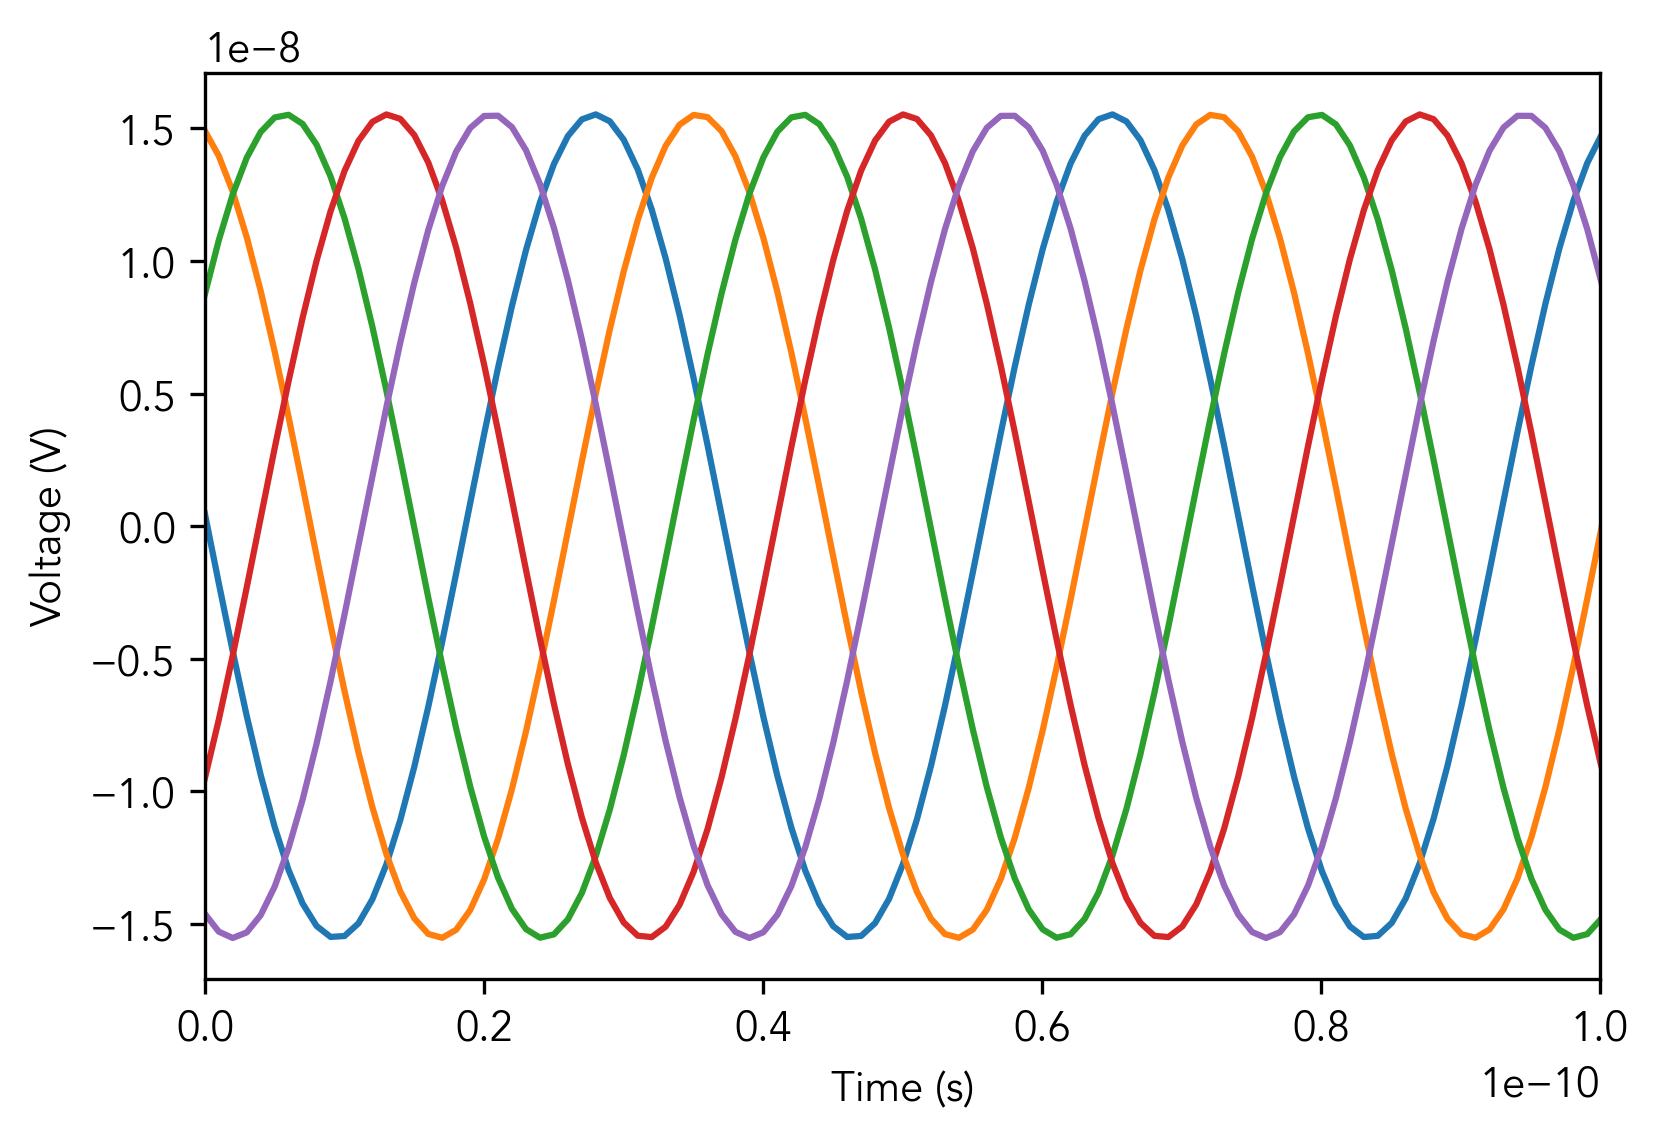

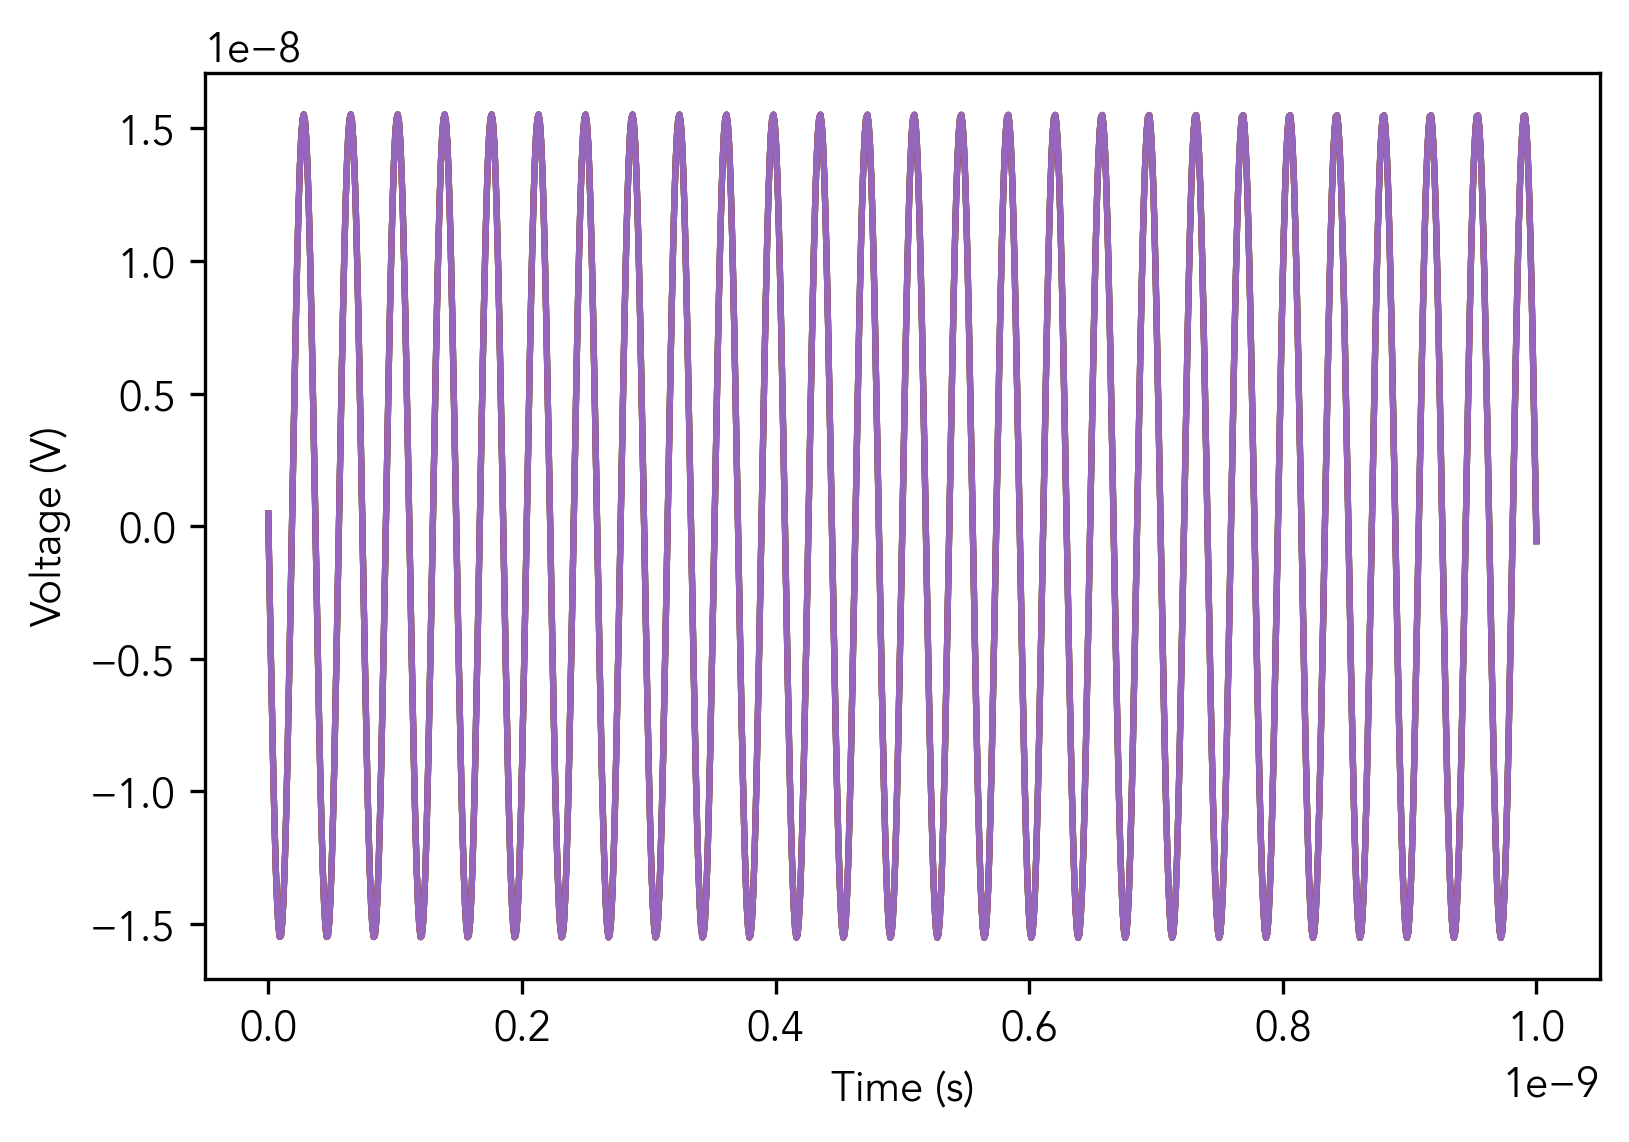

In [21]:
def convertEfieldtoVHalfWaveDipole(eField,wavelength):
    return eField*wavelength/math.pi

fig, ax = plt.subplots()
for i in range(len(theta)):
    ax.plot(tIn,convertEfieldtoVHalfWaveDipole(eFieldArray[1,i,:],lambdaEnd))
    print(theta[i],(theta[i]/omega)/(tIn[1]-tIn[0]))
ax.set_xlim([0,0.1e-9])
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (V)")
    
    
fig, ax = plt.subplots()
for i in range(len(theta)):
    ax.plot(tIn,convertEfieldtoVHalfWaveDipole(eFieldShiftedArray[i,1,:],lambdaEnd))
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (V)")

Text(0, 0.5, 'Voltage (V)')

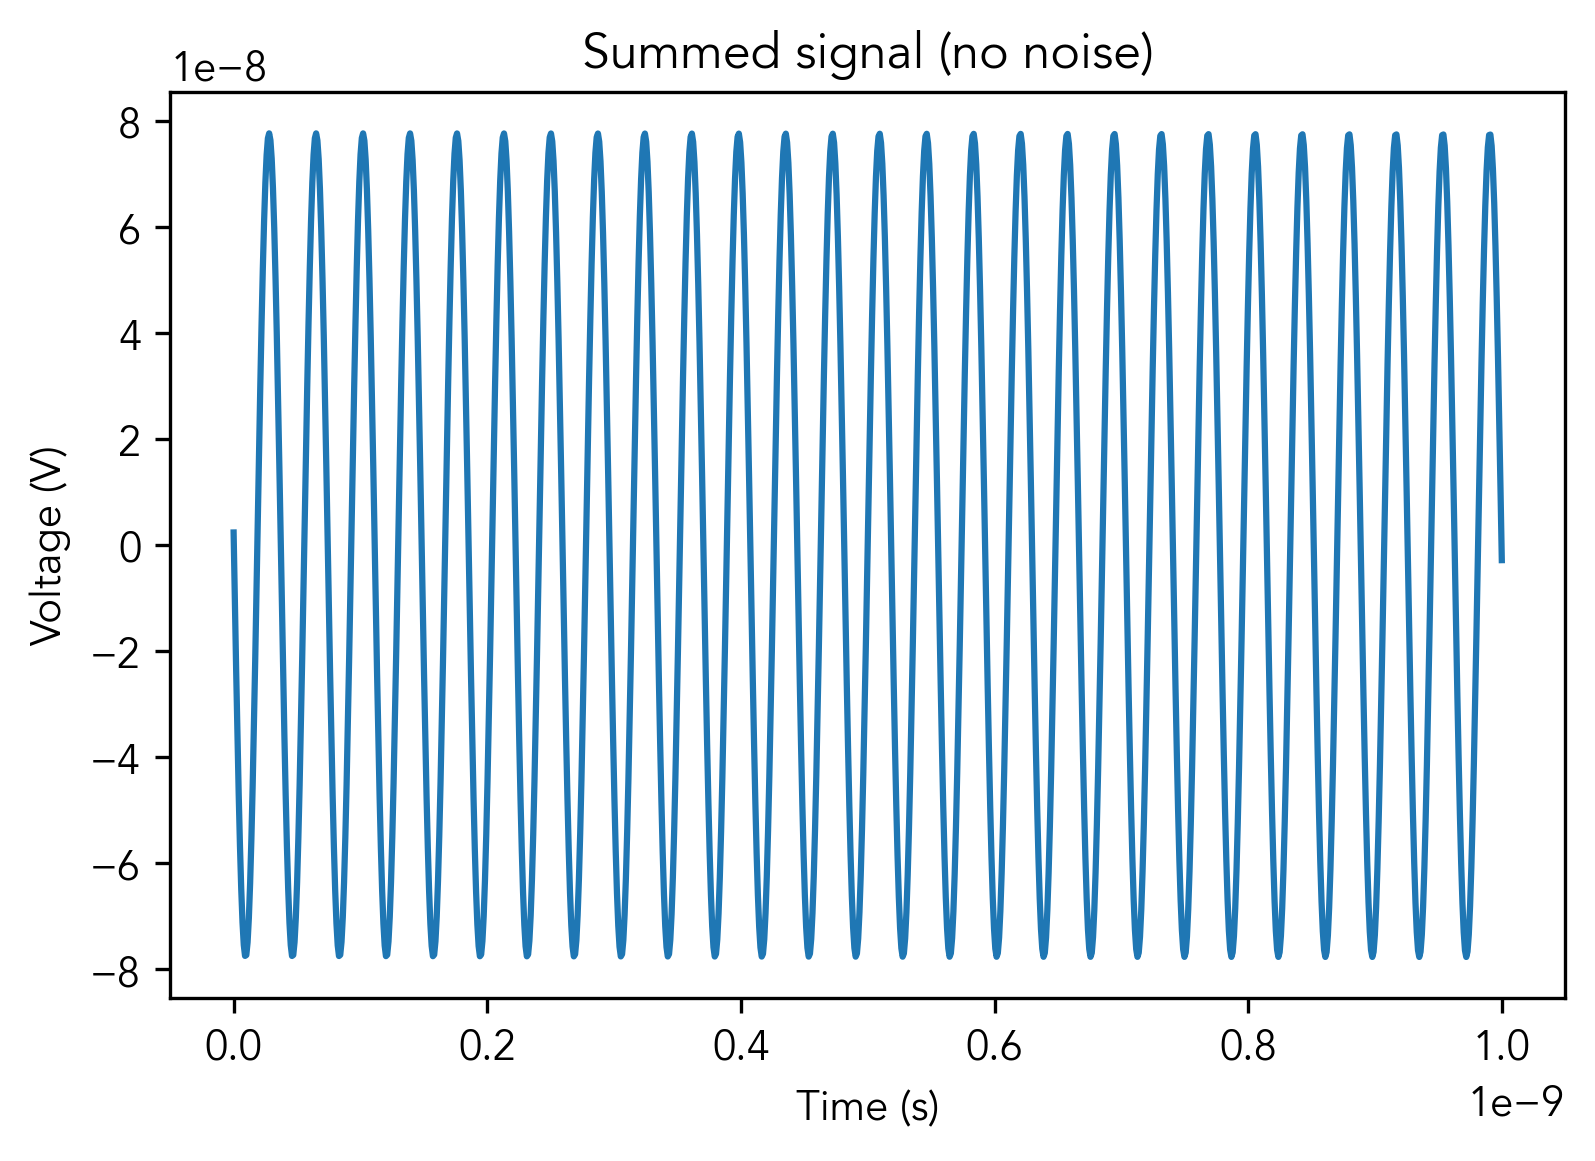

In [15]:
def getVoltArray(T,B,z,phi,rycl,tIn,omegaShift,coord,offset=[0,0,0]):
    eFieldShiftedArray=[]
    for th in theta:
        eF=electricFieldRotatingDipole(T,B,z,th,rcyl,tIn+th/omegaShift,coord='cylindrical',offset=offset)
        eFieldShiftedArray.append(eF)
    eFieldShiftedArray=np.array(eFieldShiftedArray)
    voltArray=convertEfieldtoVHalfWaveDipole(eFieldShiftedArray[:,1,:],lambdaEnd)
    return voltArray
    

voltArray=getVoltArray(getTInJ(T_end_ev),1,z,th,rcyl,tIn,omega,coord='cylindrical')
fig, ax = plt.subplots()
sumArray=np.sum(voltArray,axis=0)
ax.plot(tIn,sumArray)
ax.set_title("Summed signal (no noise)")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (V)")

In [16]:
energyArray=np.linspace(1000,T_end_ev,100)
print(energyArray)

def getMaxSignalArray(energyArray,B,offset=[0,0,0]):
    maxSignalArray=np.zeros(energyArray.shape)
    maxSingle=np.zeros(energyArray.shape)
    for idx,T in enumerate(energyArray):
        voltArray=getVoltArray(getTInJ(T),1,z,th,rcyl,tIn,omega,coord='cylindrical',offset=offset)
        sumArray=np.sum(voltArray,axis=0)
        maxSignalArray[idx]=np.max(sumArray)
        maxSingle[idx]=np.max(voltArray)
    return maxSignalArray

def getMaxSingleArray(energyArray,B,offset=[0,0,0]):
    maxSingle=np.zeros(energyArray.shape)
    for idx,T in enumerate(energyArray):
        voltArray=getVoltArray(getTInJ(T),1,z,th,rcyl,tIn,omega,coord='cylindrical',offset=offset)
        maxSingle[idx]=np.max(voltArray)
    return maxSingle


[ 1000.          1177.51515152  1355.03030303  1532.54545455
  1710.06060606  1887.57575758  2065.09090909  2242.60606061
  2420.12121212  2597.63636364  2775.15151515  2952.66666667
  3130.18181818  3307.6969697   3485.21212121  3662.72727273
  3840.24242424  4017.75757576  4195.27272727  4372.78787879
  4550.3030303   4727.81818182  4905.33333333  5082.84848485
  5260.36363636  5437.87878788  5615.39393939  5792.90909091
  5970.42424242  6147.93939394  6325.45454545  6502.96969697
  6680.48484848  6858.          7035.51515152  7213.03030303
  7390.54545455  7568.06060606  7745.57575758  7923.09090909
  8100.60606061  8278.12121212  8455.63636364  8633.15151515
  8810.66666667  8988.18181818  9165.6969697   9343.21212121
  9520.72727273  9698.24242424  9875.75757576 10053.27272727
 10230.78787879 10408.3030303  10585.81818182 10763.33333333
 10940.84848485 11118.36363636 11295.87878788 11473.39393939
 11650.90909091 11828.42424242 12005.93939394 12183.45454545
 12360.96969697 12538.48

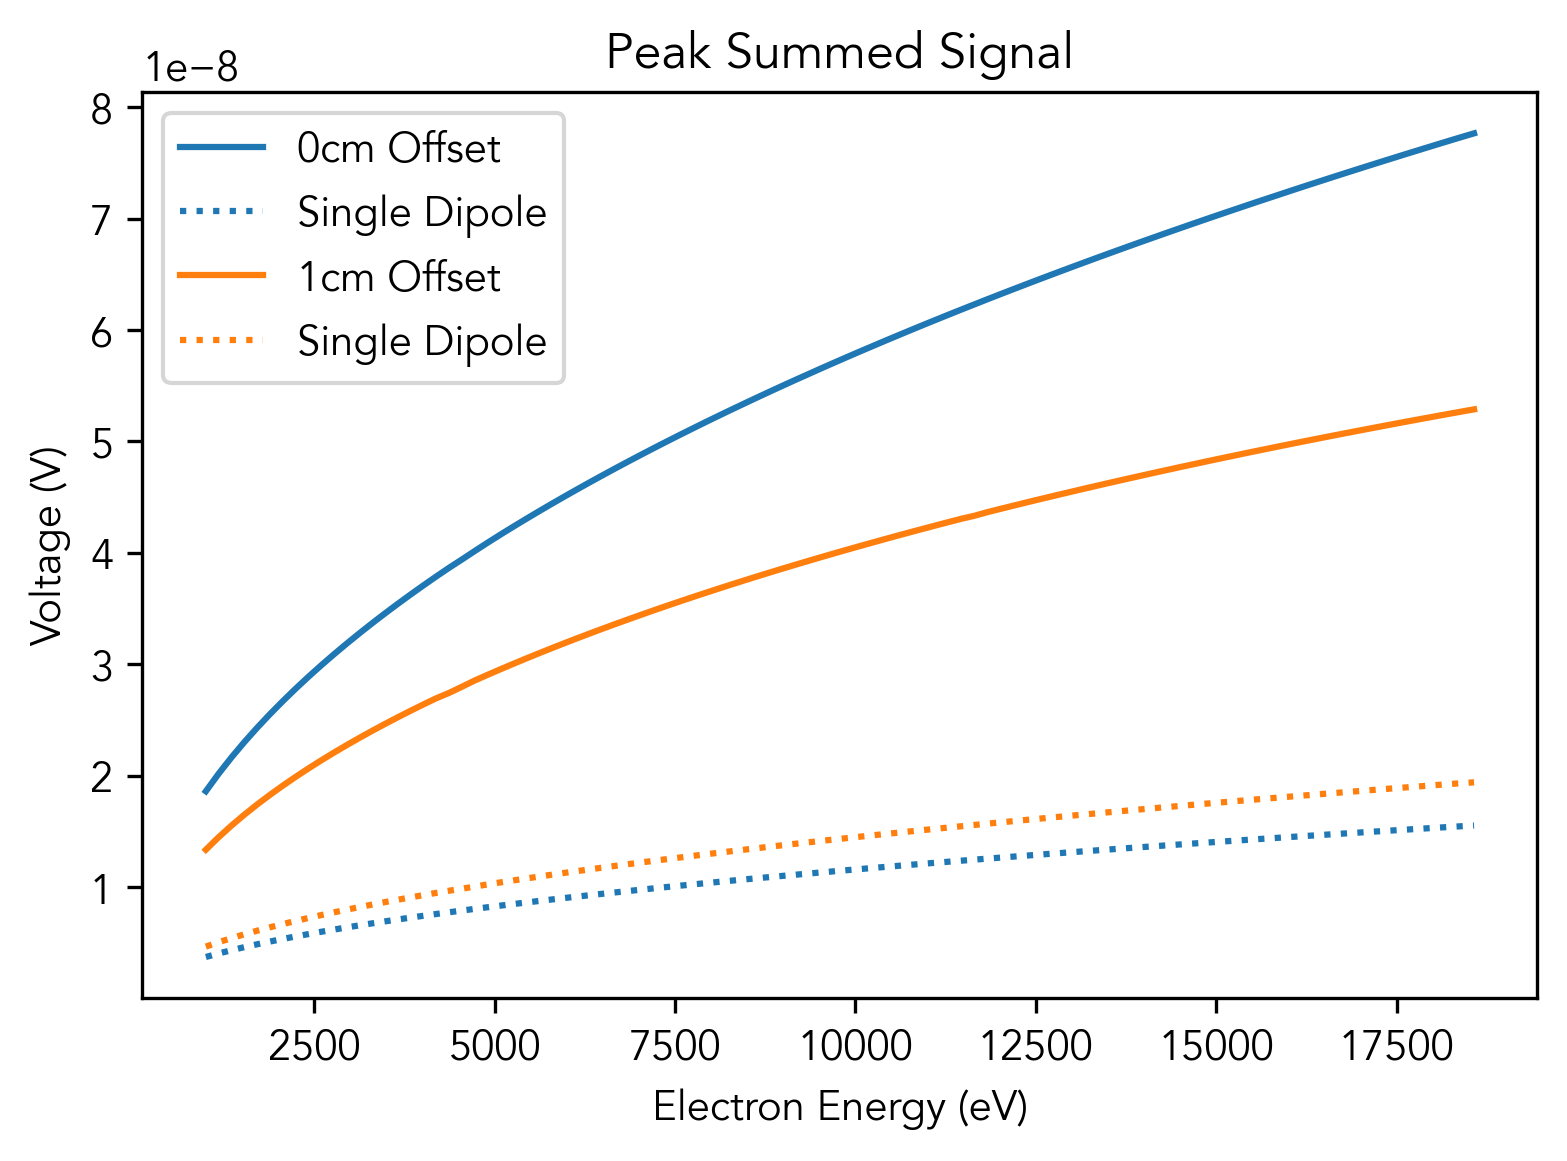

In [17]:
fig, ax = plt.subplots()
line,=ax.plot(energyArray,getMaxSignalArray(energyArray,1,offset=[0,0,0]),label="0cm Offset")
ax.plot(energyArray,getMaxSingleArray(energyArray,1,offset=[0,0,0]),color = line.get_color(), linestyle = ':',label="Single Dipole")
line,=ax.plot(energyArray,getMaxSignalArray(energyArray,1,offset=[0.01,0,0]),label="1cm Offset")
ax.plot(energyArray,getMaxSingleArray(energyArray,1,offset=[0.01,0,0]),color = line.get_color(), linestyle = ':',label="Single Dipole")
ax.set_title("Peak Summed Signal")
ax.set_xlabel("Electron Energy (eV)")
ax.set_ylabel("Voltage (V)")
ax.legend()



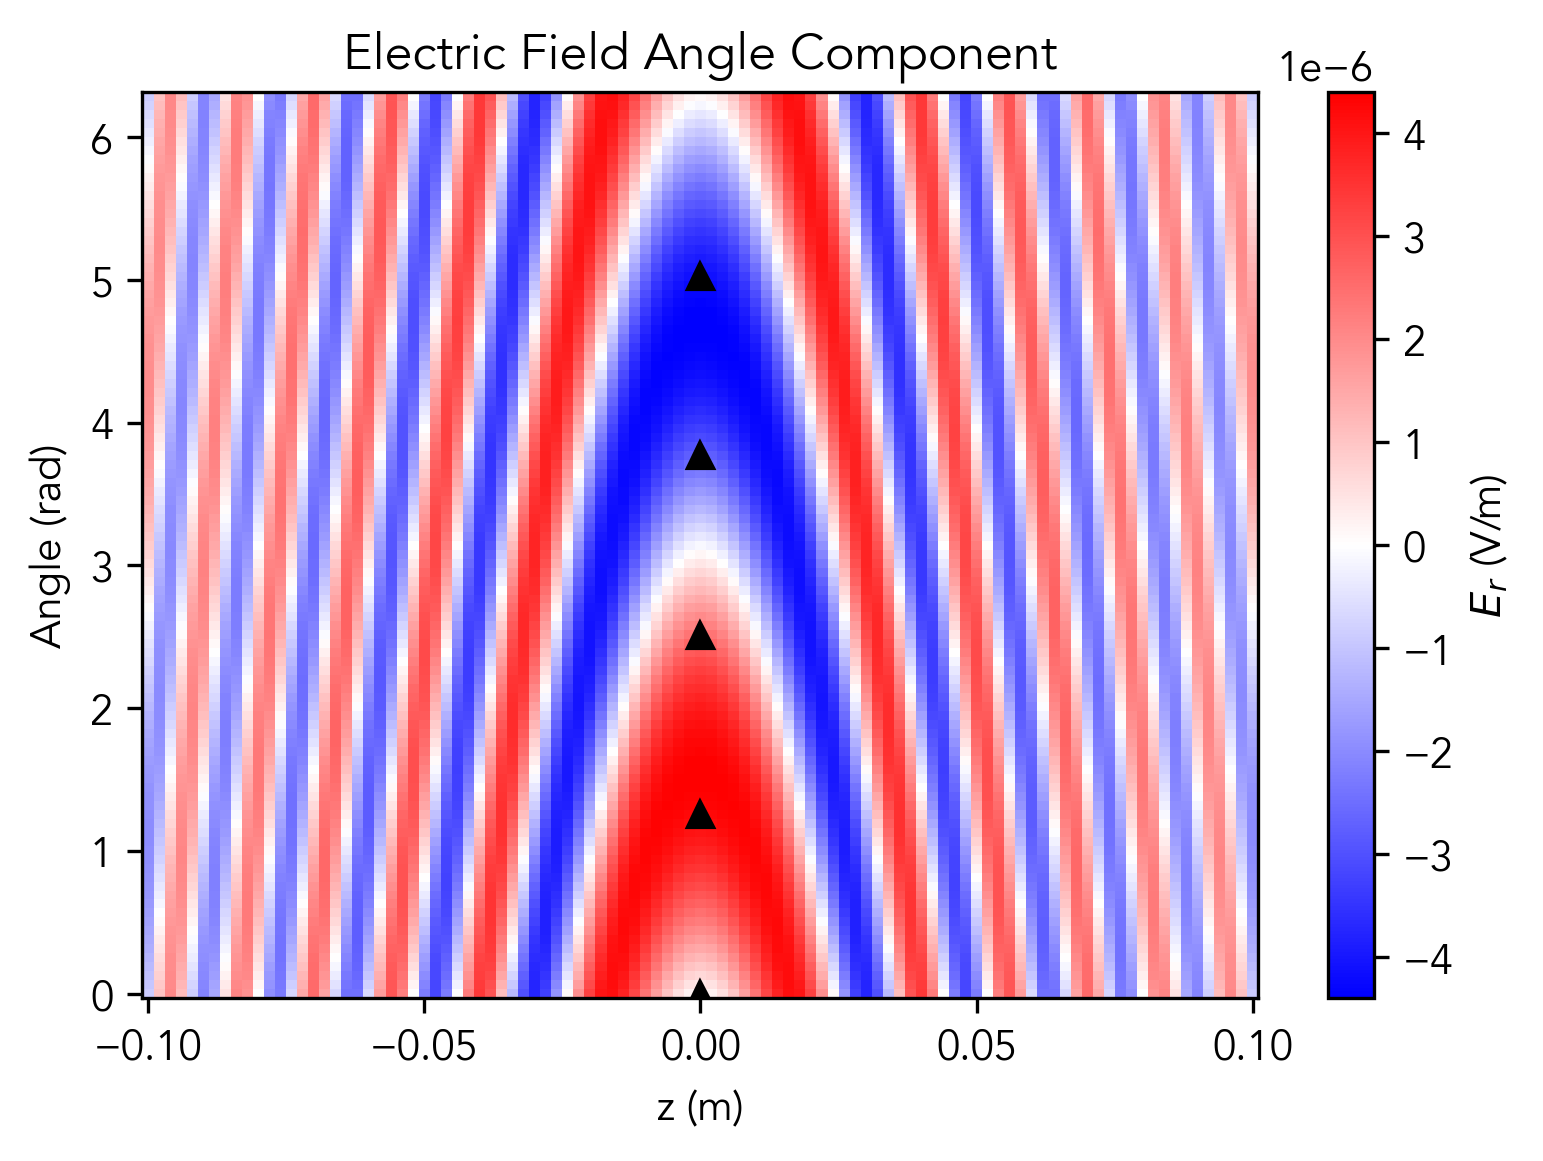

In [20]:

fig, ax = plt.subplots()
cmap=ax.pcolormesh(Z, Theta,eFieldAngle[:,:,0],vmax=eMax,vmin=-eMax,cmap='bwr')
cbar=fig.colorbar(cmap)
ax.set_title("Electric Field Angle Component")
ax.set_xlabel("z (m)")
ax.set_ylabel("Angle (rad)")
cbar.set_label("$E_r$ (V/m)")

ax.plot([0,0,0,0,0],theta,"^",color='black')

